In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
np.random.seed(10)
from keras.datasets import mnist
from rcnn.load_data import rcnn_format
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

## 載入測試資料

In [2]:
#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature, train_label),(test_feature, test_label) = rcnn_format('Face', (92, 112, 3))
#將 Features 特徵值轉換為 30912個 float 數字的 1 維向量
test_feature_vector = test_feature.reshape(len(test_feature), 30912).astype('float32')
#Features 特徵值標準化
test_feature_normalize = test_feature_vector/255
#label 轉換為 One-Hot Encoding 編碼
#test_label_onehot = np_utils.to_categorical(test_label[:,0])
test_label_onehot = to_categorical(test_label[:,0])

Load dataset: Face\pos


## 載入訓練模型檔

In [3]:
model = load_model('Face_mlp_model.h5')

In [4]:
#預測
predict=model.predict(test_feature_normalize)
prediction=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 83ms/step


In [7]:
#顯示圖像、預測值、真實值 
#show_images_labels_predictions(test_feature,test_label,prediction,0)

In [5]:
# 顯示圖片及預測結果的函數
import random

def plot_images_labels_prediction(images, labels, prediction=[], names=[], predictions_array=[], num=20):
    # 取得 pyplot 物件參考
    fig = plt.gcf()

    # 設定畫布大小為 12 吋*14吋
    fig.set_size_inches(12, 14)

    idx = random.randint(0, images.shape[0] - 1)

    # 限制最多顯示 20 個子圖
    if num > 20: num = 20

    # 依序顯示 num 個子圖
    for i in range(0, num):
        # 建立 5*5 個子圖中的第 i+1 個 
        ax = plt.subplot(5, 5, i + 1)

        # 顯示子圖
        ax.imshow(images[idx], cmap='gray')

        title = ""
        color = 'black'
        label = labels[idx]
        pred = None

        # 有預測值就加入標題中
        if len(prediction) > 0:
            if prediction[idx] != labels[idx]:
                color = 'red'
                confidence = 100 * np.min(predictions_array[idx])
            else:
                color = 'blue'
                confidence = 100 * np.max(predictions_array[idx])
            pred = prediction[idx]
        
        if len(names) > 0:
            # print(names)
            # print(label)
            label = names[label]
            if pred != None:
                pred = names[pred]

        title = "label = " + str(label)
        if pred != None: title += "\npredict = " + str(pred)

        title = "{}\nscore={:2.2f}%".format(title, confidence)

        # 設定標題
        ax.set_title(title, fontsize=10, color=color) 
        
        # 不顯示 x 、y軸刻度
        ax.set_xticks([]);  
        ax.set_yticks([]);
        
        # 樣本序號增量 1
        idx += 1    
        if idx >= images.shape[0]:
            idx = 0
    
    # 繪製圖形
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    plt.show()

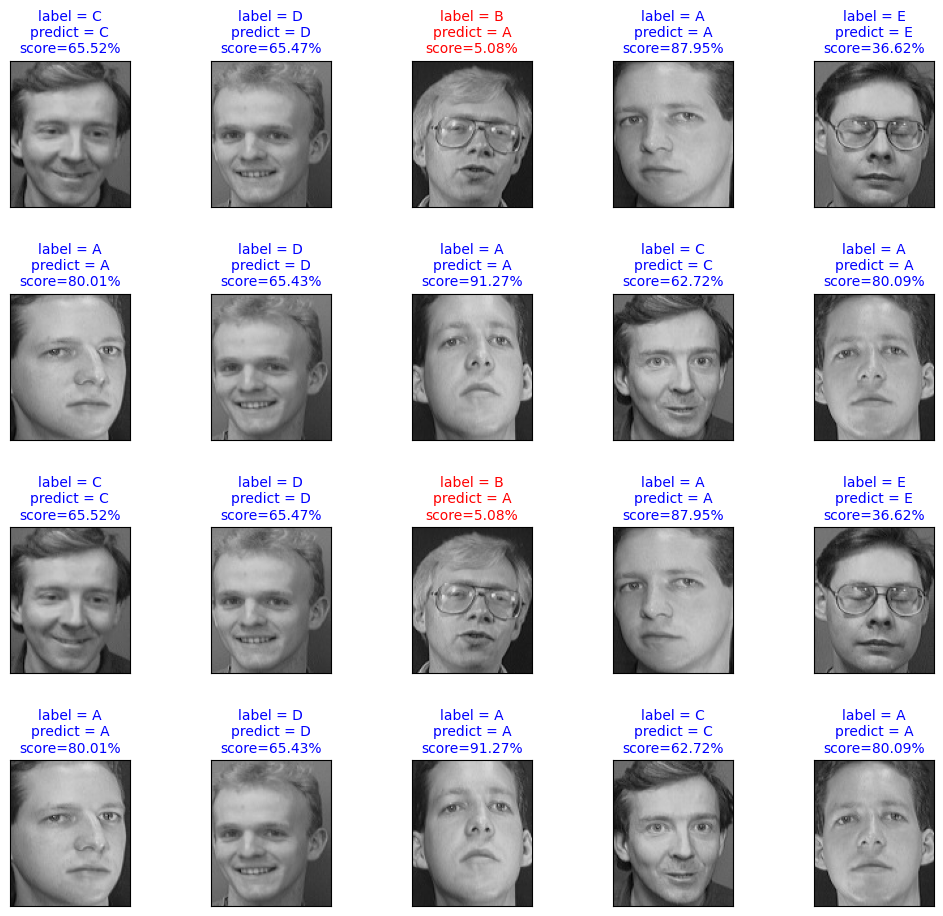

In [6]:
#標籤名稱
NAMES = ['A', 'B', 'C', 'D', 'E']
plot_images_labels_prediction(test_feature, np.argmax(test_label_onehot, axis=1), np.argmax(predict, axis=1), NAMES, predictions_array=predict)